# Importing Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading the dataset


In [ ]:
url = "https://raw.githubusercontent.com/ronydebnath/STDS-15/main/Dataset/heart_2020_cleaned.csv?token=GHSAT0AAAAAACHSU2OQOR67NPLGHE3UPBIIZIJGDTA"
df = pd.read_csv(url)

# General info about the dataset


In [ ]:
df.head()


In [ ]:
df.shape

In [ ]:
df.info()

There is no null object in our dataset

In [ ]:
# checking the duplicate
df.duplicated().sum()

In [ ]:
# General description about our dataset
df.describe()

In [ ]:
df['AgeCategory'].value_counts()

# Changing values(yes,no)into numeric values 0,1

In [ ]:
df['AgeCategory'] = df['AgeCategory'].str[:2]

In [ ]:
df=df.replace('No','0')
df= df.replace('Yes','1')
df=df.replace('Female','0')
df= df.replace('Male','1')
df

# changing general health into numeric values

In [ ]:
df['GenHealth']=df['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

In [ ]:
df["Diabetic"]=df['Diabetic'].replace('No, borderline diabetes','3')
df["Diabetic"]=df['Diabetic'].replace('Yes (during pregnancy)','4')

In [ ]:
df

In [ ]:
x = df.drop(['HeartDisease','Race'],axis = 1)

In [ ]:
y = df['HeartDisease']

In [ ]:
x

In [ ]:
x.info()


In [ ]:
x=x.astype('float32')


In [ ]:
x.info()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [ ]:
y.value_counts()


In [ ]:
 y.value_counts().plot.pie(autopct = '%0.2f')


# 1. Prediction with imbalanced data

In [ ]:
# Placeholders for accuracy values
decision_tree_accuracy_imbalanced = None
logistic_regression_accuracy_imbalanced = None
random_forest_accuracy_imbalanced = None
decision_tree_accuracy_balanced_under = None
logistic_regression_accuracy_balanced_under = None
random_forest_accuracy_balanced_under = None
decision_tree_accuracy_balanced_over = None
logistic_regression_accuracy_balanced_over = None
random_forest_accuracy_balanced_over = None

# Placeholders for recall values
decision_tree_recall_imbalanced = None
logistic_regression_recall_imbalanced = None
random_forest_recall_imbalanced = None
decision_tree_recall_balanced_under = None
logistic_regression_recall_balanced_under = None
random_forest_recall_balanced_under = None
decision_tree_recall_balanced_over = None
logistic_regression_recall_balanced_over = None
random_forest_recall_balanced_over = None

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Placeholders for recall values
decision_tree_recall_imbalanced = None
logistic_regression_recall_imbalanced = None
random_forest_recall_imbalanced = None
decision_tree_recall_balanced_under = None
logistic_regression_recall_balanced_under = None
random_forest_recall_balanced_under = None
decision_tree_recall_balanced_over = None
logistic_regression_recall_balanced_over = None
random_forest_recall_balanced_over = None


## 1.1 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, max_features=4)
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
decision_tree_accuracy_imbalanced = dt.score(x_test, y_test)
y_pred = dt.predict(x_test)



## Decision Tree Model Evaluation with imbalanced data

In [ ]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
decision_tree_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

# Decision Tree - cross validation

In [ ]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(dt, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

---

## 1.2 Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_train, y_train)

LOG.score(x_train, y_train)

logistic_regression_accuracy_imbalanced = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)


## Logistic regression Model Evaluation with imbalanced data

In [ ]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Logistic regression - cross validation

In [ ]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)

---


## 1.3 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_train, y_train)

rf.score(x_train, y_train)

random_forest_accuracy_imbalanced = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)

# Random Forest Classifier Model Evaluation with imbalanced data

In [ ]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

# Random Forest Classifier - Cross validation

In [ ]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

---

# 2. Prediction with balanced data
### Addressing the issue of imbalanced datasets using random under-sampling

In [ ]:
# Importing necessary libraries
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Initializing RandomUnderSampler
RUS = RandomUnderSampler(sampling_strategy=1)

In [ ]:
# Performing under-sampling on the training data
x_res , y_res = RUS.fit_resample(x_train,y_train)

In [ ]:
# Visualizing the class distribution using a pie chart
y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# Displaying the value counts of the resampled target variable
y_res.value_counts()

In [ ]:
# Displaying the resampled feature data
x_res

# 2.1 Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5 , max_features= 4)

In [ ]:
dt.fit(x_res,y_res)

In [ ]:
dt.score(x_res,y_res)

In [ ]:
decision_tree_accuracy_balanced_under = dt.score(x_test,y_test)

In [ ]:
y_pred = dt.predict(x_test)

## Decision Tree Model Evaluation with Random Under-Sampled data

In [ ]:
con = confusion_matrix(y_test , y_pred)
con

In [ ]:
plot_confusion_matrix(con )

In [ ]:
print (classification_report(y_test , y_pred))
decision_tree_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Decision Tree

In [ ]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt , x,y , cv = K_fold , scoring= scoring)
print (score)

In [ ]:
round(np.mean(score)*100 , 2)


# 2.2 Logistic Regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_res, y_res)

LOG.score(x_res, y_res)

logistic_regression_accuracy_balanced_under = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)

## Logistic Regression Model Evaluation with Random Under-Sampled data

In [ ]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Logistic Regression - Cross validation

In [ ]:
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)

---

# 2.3 Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_res, y_res)

rf.score(x_res, y_res)

random_forest_accuracy_balanced_under = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)


## Random Forest Classifier Model Evaluation with Random Under-Sampled data

In [ ]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Cross validation of Random Forest Classifier

In [ ]:
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

# 3. Prediction with balanced data
### Addressing the issue of imbalanced datasets using Random Over-Sampling Technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ROS = RandomOverSampler(sampling_strategy = 1)

In [ ]:
x_res, y_res = ROS.fit_resample(x_train,y_train)

In [ ]:
y_res.value_counts().plot.pie(autopct = "%.2f")


In [ ]:
y_res.value_counts()


# 3.1 Decision tree classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, max_features=4)
dt.fit(x_res, y_res)
dt.score(x_res, y_res)
decision_tree_accuracy_balanced_over = dt.score(x_test, y_test)
y_pred = dt.predict(x_test)

## Decision Tree Model Evaluation with Random Over-Sampled data

In [ ]:
## Decision Tree Model Evaluation with Random Under-sampled data
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))

decision_tree_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Decision Tree Model

In [ ]:
## Cross validation of Decision Tree
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(dt, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

---

# 3.2 Logistic Regression classifier


In [ ]:
# 3.2 Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_res, y_res)

LOG.score(x_res, y_res)

logistic_regression_accuracy_balanced_over = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)

## Logistic Regression Model Evaluation with Random Over-Sampled data


In [ ]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Logistic Regression Model

In [ ]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)


# 3.3 Random Forest classifier

In [ ]:

# 3.3 Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_res, y_res)

rf.score(x_res, y_res)

random_forest_accuracy_balanced_over = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)

## Random Forest Classifier Model Evaluation with Random Over-Sampled data


In [ ]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Cross validation of Random Forest Classifier

In [ ]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

---

# Performance Evaluation

In [395]:
import pandas as pd

# Creating a dictionary for the data
data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Imbalanced Accuracy': [decision_tree_accuracy_imbalanced, logistic_regression_accuracy_imbalanced, random_forest_accuracy_imbalanced],
    'Balanced (Under) Accuracy': [decision_tree_accuracy_balanced_under, logistic_regression_accuracy_balanced_under, random_forest_accuracy_balanced_under],
    'Balanced (Over) Accuracy': [decision_tree_accuracy_balanced_over, logistic_regression_accuracy_balanced_over, random_forest_accuracy_balanced_over],
    'Imbalanced Recall': [decision_tree_recall_imbalanced, logistic_regression_recall_imbalanced, random_forest_recall_imbalanced],
    'Balanced (Under) Recall': [decision_tree_recall_balanced_under, logistic_regression_recall_balanced_under, random_forest_recall_balanced_under],
    'Balanced (Over) Recall': [decision_tree_recall_balanced_over, logistic_regression_recall_balanced_over, random_forest_recall_balanced_over]
}

# Creating pandas DataFrames
accuracy_df = pd.DataFrame(data, columns=['Model', 'Imbalanced Accuracy', 'Balanced (Under) Accuracy', 'Balanced (Over) Accuracy'])
recall_df = pd.DataFrame(data, columns=['Model', 'Imbalanced Recall', 'Balanced (Under) Recall', 'Balanced (Over) Recall'])

# Displaying the tables
print("Accuracy Table:")
print(accuracy_df)
print("\n\n")
print("Recall Table:")
print(recall_df)


Accuracy Table:
                 Model  Imbalanced Accuracy  Balanced (Under) Accuracy  \
0        Decision Tree             0.914805                   0.627949   
1  Logistic Regression             0.914805                   0.753717   
2        Random Forest             0.914602                   0.655795   

   Balanced (Over) Accuracy  
0                  0.700339  
1                  0.750246  
2                  0.724620  



Recall Table:
                 Model  Imbalanced Recall  Balanced (Under) Recall  \
0        Decision Tree           0.035518                 0.842365   
1  Logistic Regression           0.135482                 0.776272   
2        Random Forest           0.000000                 0.838521   

   Balanced (Over) Recall  
0                0.803003  
1                0.777188  
2                0.759429  


# Visualising the performance Based on Accuracy

In [ ]:
# Define a function for visualizing the performance
def visualize_performance(title, data_labels, values, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data_labels, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

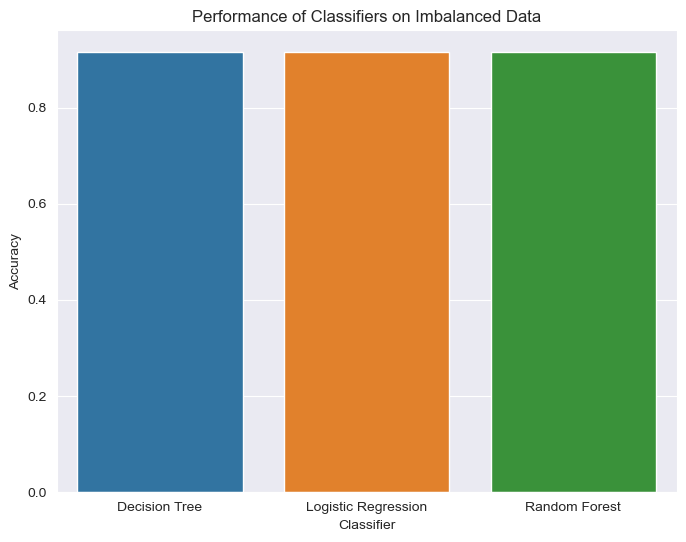

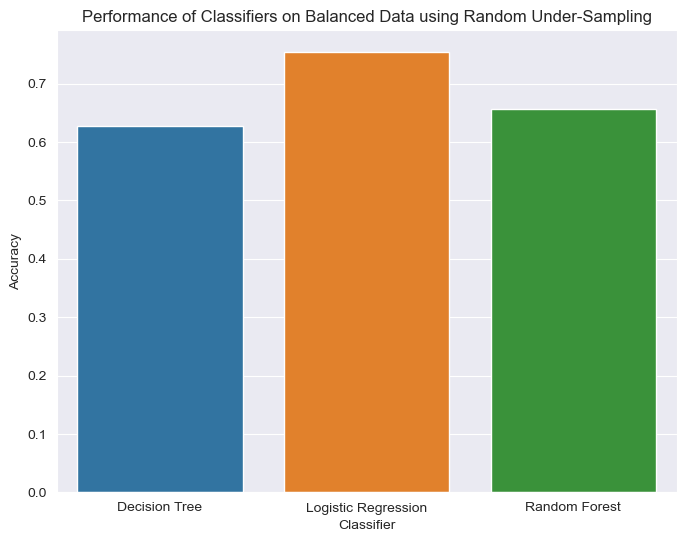

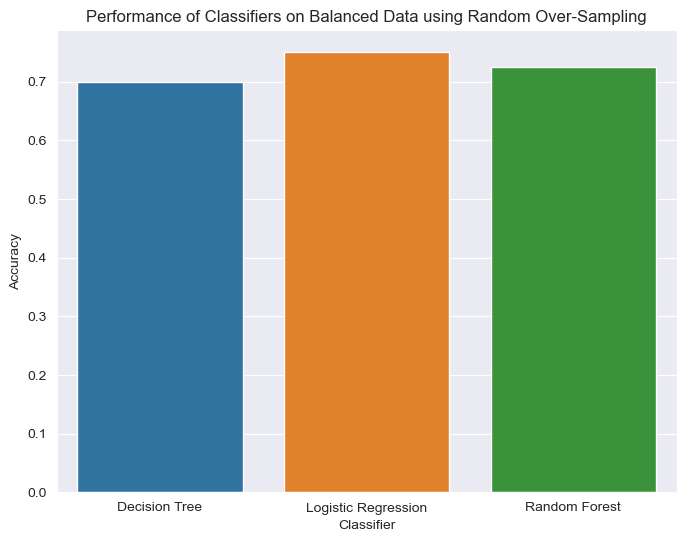

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the performance of the classifiers
imbalanced_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
imbalanced_values = [decision_tree_accuracy_imbalanced, logistic_regression_accuracy_imbalanced, random_forest_accuracy_imbalanced]
visualize_performance("Performance of Classifiers on Imbalanced Data", imbalanced_data_labels, imbalanced_values, "Classifier", "Accuracy")

balanced_under_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_under_sampling_values = [decision_tree_accuracy_balanced_under, logistic_regression_accuracy_balanced_under, random_forest_accuracy_balanced_under]
visualize_performance("Performance of Classifiers on Balanced Data using Random Under-Sampling", balanced_under_sampling_data_labels, balanced_under_sampling_values, "Classifier", "Accuracy")

balanced_over_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_over_sampling_values = [decision_tree_accuracy_balanced_over, logistic_regression_accuracy_balanced_over, random_forest_accuracy_balanced_over]
visualize_performance("Performance of Classifiers on Balanced Data using Random Over-Sampling", balanced_over_sampling_data_labels, balanced_over_sampling_values, "Classifier", "Accuracy")


---

# Visualising the performance Based on Recall Value

In [ ]:

# Define a function for visualizing the performance based on recall
def visualize_recall_performance(title, data_labels, values, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data_labels, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualizing the performance of the classifiers based on recall
imbalanced_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
imbalanced_values = [decision_tree_recall_imbalanced, logistic_regression_recall_imbalanced, random_forest_recall_imbalanced]
visualize_recall_performance("Performance Comparison based on Recall (Imbalanced Data)", imbalanced_data_labels, imbalanced_values, "Classifier", "Recall")

balanced_under_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_under_sampling_values = [decision_tree_recall_balanced_under, logistic_regression_recall_balanced_under, random_forest_recall_balanced_under]
visualize_recall_performance("Performance Comparison based on Recall (Balanced Data using Random Under-Sampling)", balanced_under_sampling_data_labels, balanced_under_sampling_values, "Classifier", "Recall")

balanced_over_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_over_sampling_values = [decision_tree_recall_balanced_over, logistic_regression_recall_balanced_over, random_forest_recall_balanced_over]
visualize_recall_performance("Performance Comparison based on Recall (Balanced Data using Random Over-Sampling)", balanced_over_sampling_data_labels, balanced_over_sampling_values, "Classifier", "Recall")

# Standard scalar


In [ ]:
# Standardization of numeric data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_res)

X_train_scaled = scaler.transform(x_res)
X_test_scaled = scaler.transform(x_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=x_res.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=x_test.columns)
X_test_scaled.describe()